Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings to see all columns
pd.set_option('display.max_columns', None)
print("Libraries loaded successfully.")

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

Libraries loaded successfully.


Data Loading

In [2]:
df = pd.read_csv('crop_yield.csv')

Data Cleaning Logic

In [3]:
print("--- Starting Cleaning Process ---")

# 1. Fix Mixed Boolean Formats
# Convert 'True'/'False' strings and booleans to integers 1 and 0
bool_map = {'True': 1, 'False': 0, 'true': 1, 'false': 0, True: 1, False: 0}

print("Standardizing Boolean columns...")
df['Fertilizer_Used'] = df['Fertilizer_Used'].map(bool_map).fillna(0).astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].map(bool_map).fillna(0).astype(int)

--- Starting Cleaning Process ---
Standardizing Boolean columns...


In [4]:
# 2. Fix Negative Yields (Impossible Data)
initial_count = len(df)
df = df[df['Yield_tons_per_hectare'] >= 0]
dropped_yield = initial_count - len(df)
print(f"Removed {dropped_yield} rows with negative yields.")

Removed 231 rows with negative yields.


In [5]:
# 3. Sanity Checks
# Remove rows where Days_to_Harvest is negative or 0 (impossible)
initial_count = len(df)
df = df[df['Days_to_Harvest'] > 0]
print(f"Removed {initial_count - len(df)} rows with invalid harvest days.")

print(f"--- Cleaning Complete. New Shape: {df.shape} ---")
df.head()

Removed 0 rows with invalid harvest days.
--- Cleaning Complete. New Shape: (999769, 10) ---


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


Save Cleaned Data

In [6]:
output_filename = 'cleaned_agricultural_data.csv'
df.to_csv(output_filename, index=False)

print(f"✅ Success! Cleaned data saved to: {output_filename}")
print("You can now load this CSV into your training script.")

✅ Success! Cleaned data saved to: cleaned_agricultural_data.csv
You can now load this CSV into your training script.


Target Distribution (Yield)

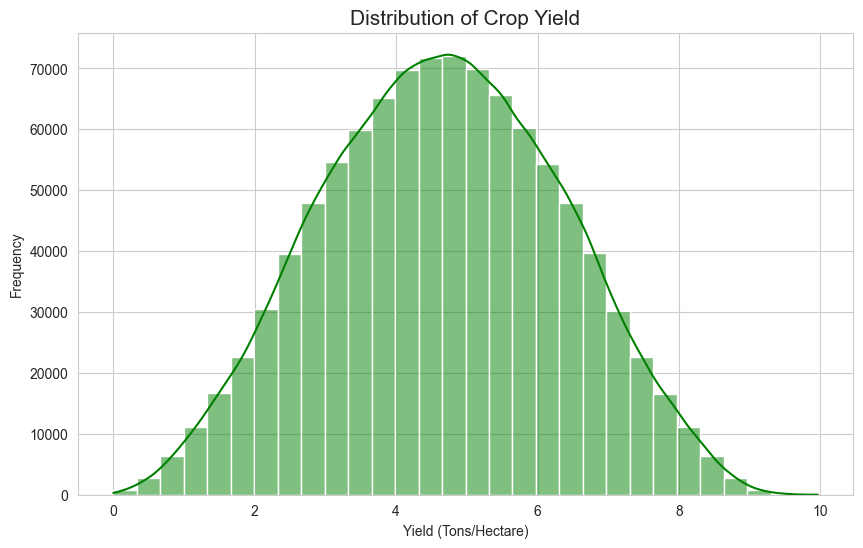

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, color='green', bins=30)
plt.title('Distribution of Crop Yield', fontsize=15)
plt.xlabel('Yield (Tons/Hectare)')
plt.ylabel('Frequency')
plt.show()

Correlation Heatmap

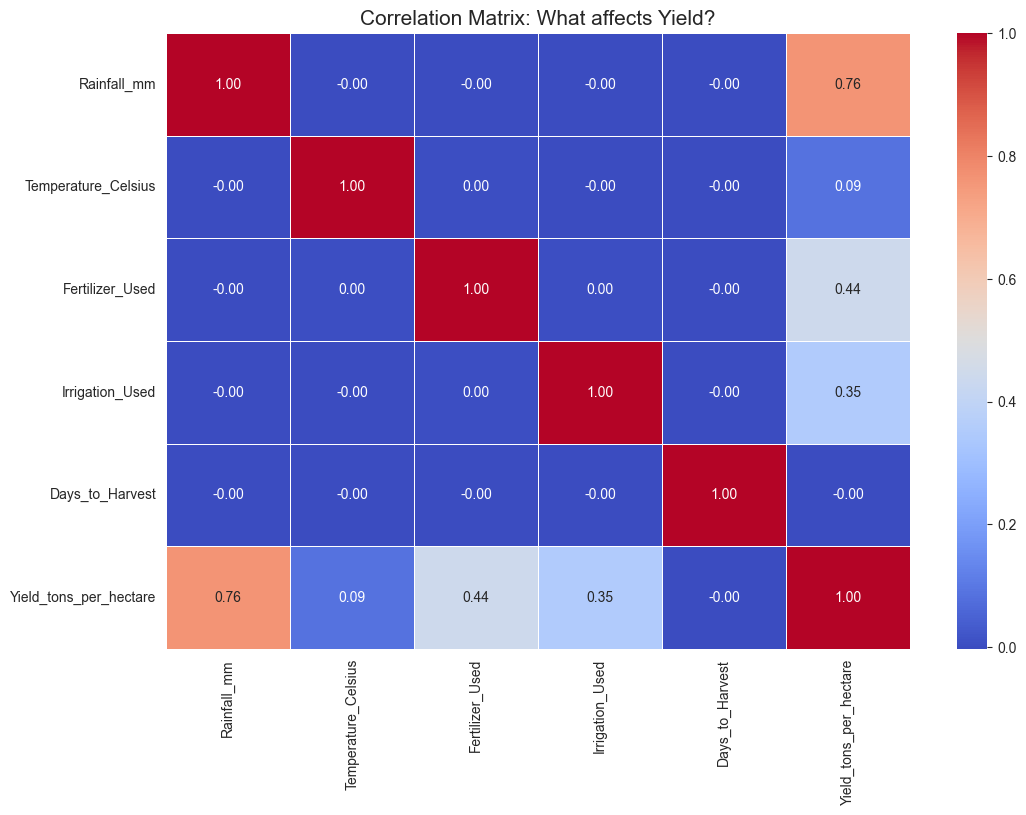

In [8]:
plt.figure(figsize=(12, 8))

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: What affects Yield?', fontsize=15)
plt.show()

Categorical Performance (Box Plots)

C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_33216\3923641638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Crop', y='Yield_tons_per_hectare', data=df, ax=axes[0], palette="Set2")
C:\Users\Mayukh Jain\AppData\Local\Temp\ipykernel_33216\3923641638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=df, ax=axes[1], palette="Set3")


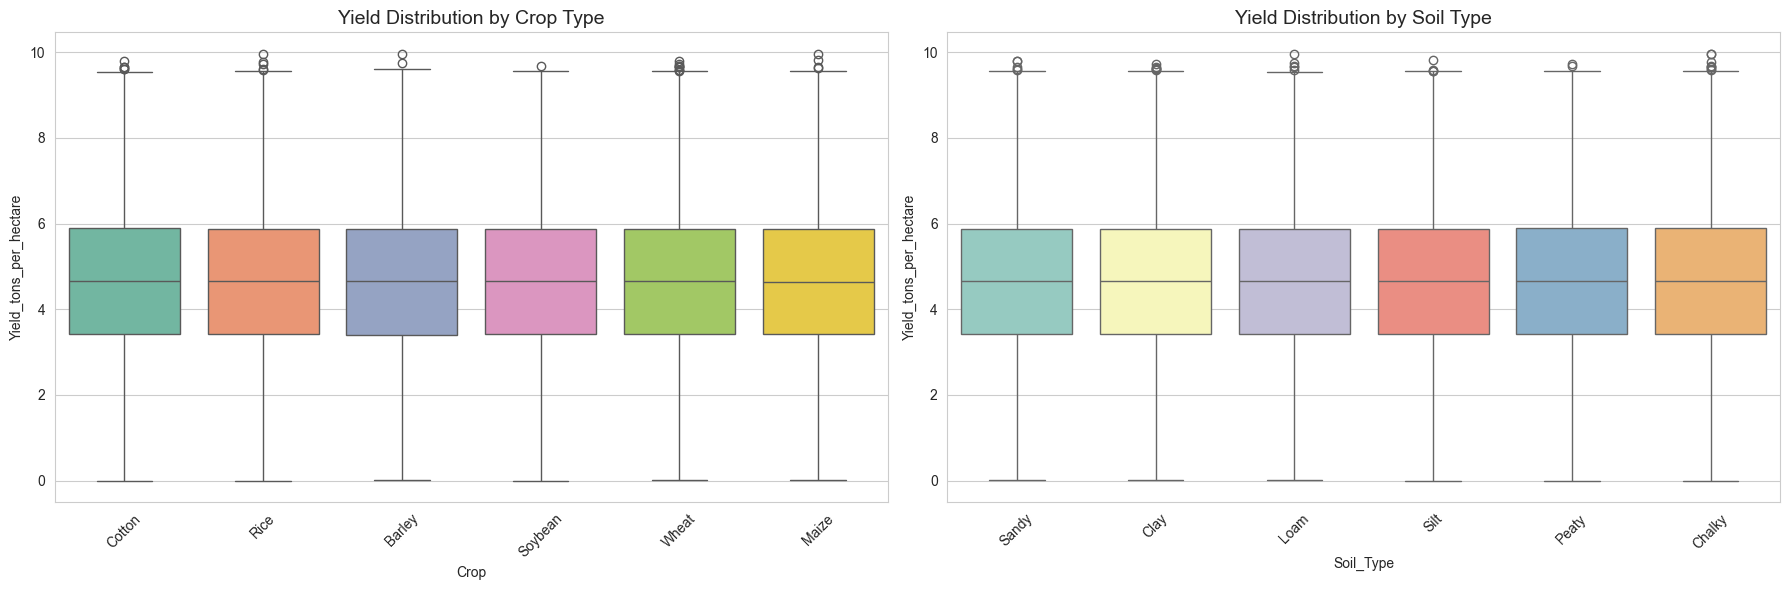

In [9]:
# Create a grid of 2 plots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Yield by Crop
sns.boxplot(x='Crop', y='Yield_tons_per_hectare', data=df, ax=axes[0], palette="Set2")
axes[0].set_title('Yield Distribution by Crop Type', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Yield by Soil Type
sns.boxplot(x='Soil_Type', y='Yield_tons_per_hectare', data=df, ax=axes[1], palette="Set3")
axes[1].set_title('Yield Distribution by Soil Type', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Numerical Trends (Scatter Plots)

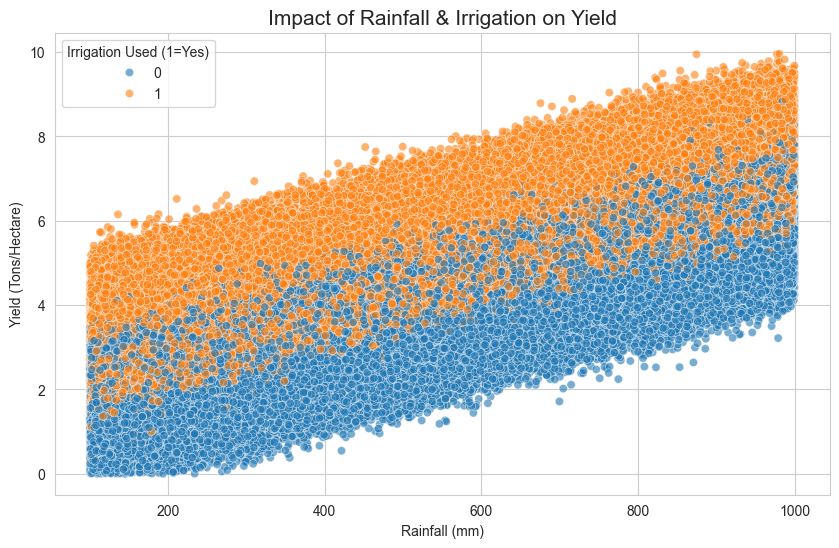

In [10]:
plt.figure(figsize=(10, 6))

# Scatter plot: Rainfall vs Yield, colored by Irrigation
sns.scatterplot(
    data=df, 
    x='Rainfall_mm', 
    y='Yield_tons_per_hectare', 
    hue='Irrigation_Used', 
    alpha=0.6
)

plt.title('Impact of Rainfall & Irrigation on Yield', fontsize=15)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield (Tons/Hectare)')
plt.legend(title='Irrigation Used (1=Yes)')
plt.show()